In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
df.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [9]:
text = ' '.join(df.Review.tolist())

In [17]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

text = text.lower()

tokenized_words = word_tokenize(text)

stop_words=stopwords.words("english")

punctuations = list(string.punctuation)

In [18]:
stop_punc_list = stop_words + punctuations 

In [19]:
filtered_tokens = [word for word in tokenized_words if word not in stop_punc_list]

In [20]:
fd = FreqDist(filtered_tokens)

fd.most_common(10)

[('food', 125),
 ('place', 106),
 ("n't", 96),
 ('good', 95),
 ('service', 83),
 ('great', 70),
 ('back', 61),
 ('like', 46),
 ('go', 43),
 ('time', 42)]

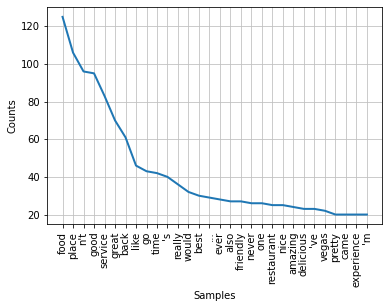

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
fd.plot(30,cumulative=False)

In [26]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

def word_cloud(title_, text):
    """ Create WorldCloud """
    stopword_list = set(STOPWORDS) 

    wordcloud = WordCloud(width = 400, height = 200, 
                    background_color ='white', 
                    stopwords = stopword_list, 
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title_, fontsize=20)
    plt.show() 

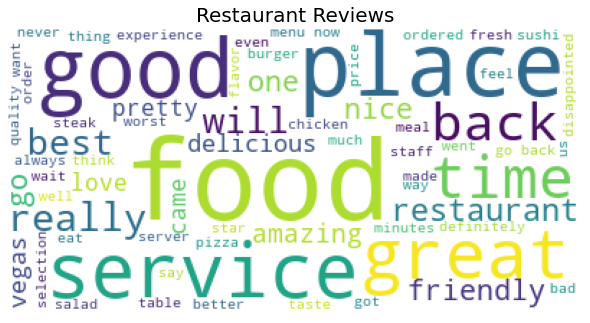

In [27]:
word_cloud("Restaurant Reviews", text)

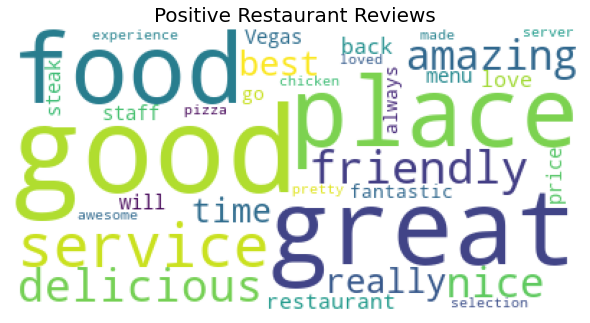

In [30]:
# Positive Reviews
paragraph=' '.join(df[df.Liked==1].Review.tolist())
word_cloud("Positive Restaurant Reviews", paragraph)

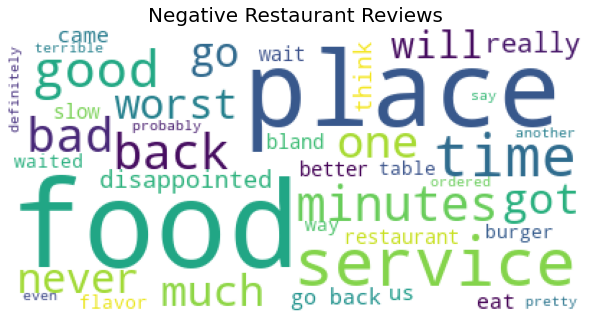

In [31]:
# Negative Reviews
paragraph=' '.join(df[df.Liked==0].Review.tolist())
word_cloud("Negative Restaurant Reviews", paragraph)

## Feature Engineering

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts = cv.fit_transform(df['Review'])

In [34]:
text_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
cv.get_feature_names()

/home/avinash/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '1',
 '10',
 '100',
 '11',
 '12',
 '15',
 '17',
 '1979',
 '2',
 '20',
 '2007',
 '23',
 '3',
 '30',
 '30s',
 '35',
 '4',
 '40',
 '40min',
 '45',
 '4ths',
 '5',
 '5lb',
 '6',
 '7',
 '70',
 '8',
 '85',
 '90',
 '99',
 'absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodations',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledged',
 'actual',
 'actually',
 'added',
 'affordable',
 'afternoon',
 'ago',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almonds',
 'amazing',
 'ambiance',
 'ambience',
 'ample',
 'andddd',
 'angry',
 'annoying',
 'anticipated',
 'anymore',
 'anytime',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app',
 'appalling',
 'apparently',
 'appealing',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'approval',
 'area',
 'aren',
 'arepas',
 'aria',
 'array',
 'arrived',
 'arrives',
 'arriving',
 'article',
 'ask',
 'asked',
 'asking',
 'assure',
 'ate',
 'atmosphere',
 'atrocious',
 'attached',
 'attac

In [36]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()

,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
count_df.shape

(1000, 1834)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    df['Liked'], 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [39]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [53]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.7566666666666667, 0.7291666666666666, 0.7553956834532374)

In [50]:
metrics.roc_auc_score(y_test, y_pred)

0.7565798293042584

In [54]:
fpr, tpr, thresholds =  metrics.roc_curve(y_test, y_pred)

metrics.auc(fpr, tpr)

0.7565798293042584

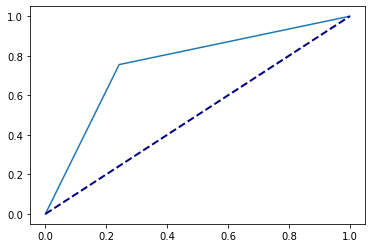

In [52]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.7366666666666667, 0.7083333333333334, 0.7338129496402878)

In [56]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.7333333333333333, 0.6787878787878788, 0.8057553956834532)

In [57]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.75, 0.7133333333333334, 0.7697841726618705)

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.6866666666666666, 0.6923076923076923, 0.5827338129496403)

In [61]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.7533333333333333, 0.773109243697479, 0.6618705035971223)

In [62]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred)

(0.76, 0.845360824742268, 0.5899280575539568)